# SyriaTel Telecom's Customer Churn Prediction

## Business Understanding
### Overview
Customer churn (the rate at which customers stop doing business with a company) directly impacts revenue,profitability and long term growth for telecommunications companies. A spike in churn rates would affect the overall performance of SyriaTel Telecom. By utilizing existing customer information, I will do a forecast on probable exits by customers. In turn, SyriaTel will be in a position to optimize customer retention strategies, maintain customer loyalty and sustain competitive advantage by establishing the churn trends.

### Business problem
SyriaTel is experiencing customer churn leading to lost revenue, increased customer acquisition expenses and a reduction in market share.  SyriaTel is unable to formulate retention plans due to lack of a clear understanding of customer churn and high-risk customers prediction leading to missed opportunities to improve customer experience, optimize retention and preserve long term profitability. This calls for a research on customers who are likely to exit SyriaTel.


To address this, I will develop a data driven solution that:
1. Identifies high risk customers before they churn.
2. Highlights key factors driving attrition.
3. Lays out actionable insights to facilitate SyriaTel's implementation of selected retention strategies.

## Data Understanding
This project entails a dataset derived from [kaggle](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset/data?resource=download). I will begin by inspecting the dataset to identify its format and key traits.

In [24]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score)
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import RocCurveDisplay
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE

In [25]:
# Loading the data

df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')

#### 1. Let us start by displaying the first five rows of the data.

In [26]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


#### 2. Next, we will identify the row and column numbers of the whole data.

In [27]:
df.shape

(3333, 21)

- The data has 3,333 rows and 21 columns.

#### 3 . Afterwards, we establish the general information on the data and each column.

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

- 4 columns are of object datatype.
- 8 columns are of datatype integer.
- There are 8 columns with float datatype.
- There is 1 column, 'churn' column, with a boolean datatype.

#### 4. Lastly, we determine the summary statistics of the columns that contain numerical data.

In [29]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


- We are now able to generate the count of non-null values to confirm we have no missing values, mean, dispersion i.e standard deviation, distribution shape i.e lower and upper quartile as well as minimum and maximum values of each column in the data.

## Data Preparation
### Data Cleaning

This process entails identifying missing values in order to drop irrelevant rows and/or columns as well as checking for duplicates and if duplicates or missing values are present in the data, action will be taken and also converting datatypes wherever necessary.

In [30]:
# Drop irrelevant columns

df.drop(columns=['total day charge', 'total eve charge' , 'total night charge' , 'total intl charge' , 'area code', 'phone number'], axis=1, inplace=True)

In [31]:
# Check for duplicates

df.duplicated().sum()

0

There are no duplicated rows in the data.

In [32]:
# Check for missing values

df.isna().sum()

state                     0
account length            0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total eve minutes         0
total eve calls           0
total night minutes       0
total night calls         0
total intl minutes        0
total intl calls          0
customer service calls    0
churn                     0
dtype: int64

There are no missing values in the data.

In [33]:
# Encode categorical variables
label_encoder = LabelEncoder()
df['international plan'] = label_encoder.fit_transform(df['international plan']) 
df['voice mail plan'] = label_encoder.fit_transform(df['voice mail plan']) 

# Convert boolean to integer
df['churn'] = df['churn'].astype(int)

### Exploratory Data Analysis
#### Univariate Analysis
We'll explore key variables such as churn, etc to understand their distributions and identify any patterns.

#### 1. Distribution of categorical data

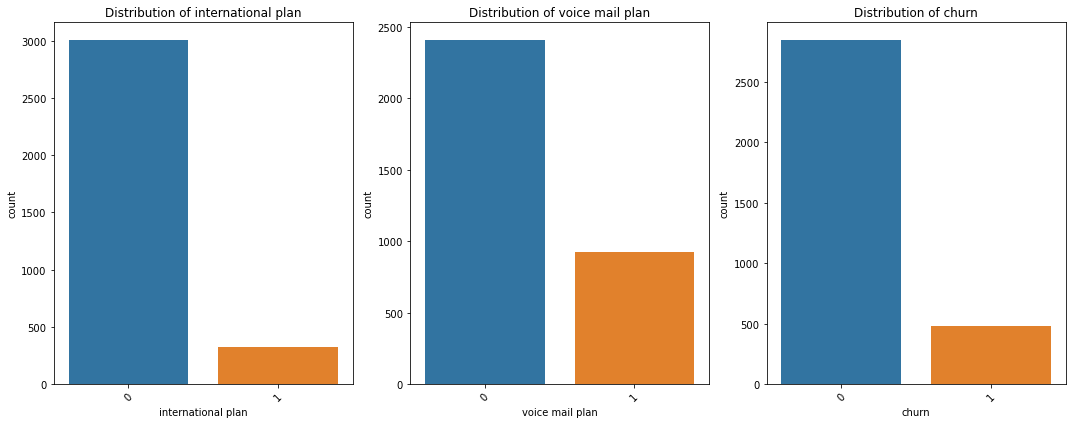

In [34]:
# Distribution of categorical data

# Categorical columns
categorical_cols = ['international plan', 'voice mail plan', 'churn']

# Plot distribution of categorical features
plt.figure(figsize=(15, 6))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(1, 3, i)  # Changed to 1 row, 3 columns
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    
plt.tight_layout()
plt.show()

- From this plot, it appears that significantly more customers have no international and voicemail plans.
- We also notice that the number of customers who do not churn is more, which is good for SyriaTel.

#### 2. Distribution of numerical data

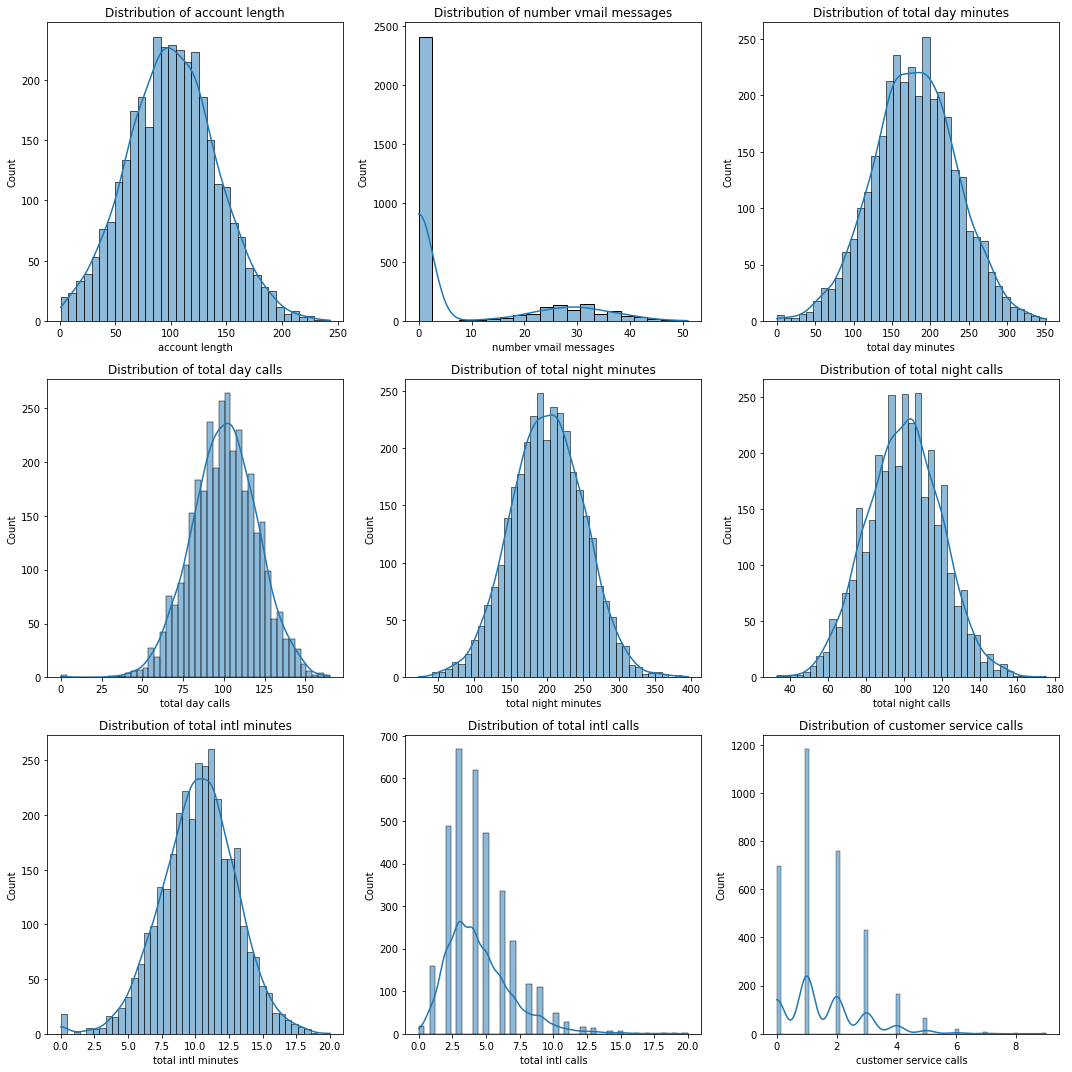

In [35]:
# Plot distributions of key numerical features
# Numerical columns (from what's visible)

numerical_cols = ['account length', 'number vmail messages', 
                 'total day minutes', 'total day calls',
                 'total night minutes', 'total night calls',
                 'total intl minutes', 'total intl calls',
                 'customer service calls']

# Plot distribution of numerical features

plt.figure(figsize=(15, 15))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


- **Distribution of total minutes** appear to follow a roughly normal distribution, centered around the mean. Majority of customers use a moderate number of total minutes, with fewer using extremely low or high total minutes.
- **Distribution of total calls** is also normal, suggesting a balanced call usage pattern. Most customers make an average number of calls, with fewer customers making an extremely low or high number of calls.
- **Distribution of customer service calls** shows a right-skewed histogram, indicating there are minimal spikes at higher values. This implies that customers rarely contact customer service. However, customers who call frequently (especially with 4 or more calls) might indicate service issues such as dissatisfaction, billing issues or technical problems which could correlate with churn.

#### 3. Multivariate Analysis
Here, we’ll examine the relationships between the target variable (churn) and other features and also multiple features against other multiple features.

- ##### Distribution of International Plan and Customer Service Calls by Churn

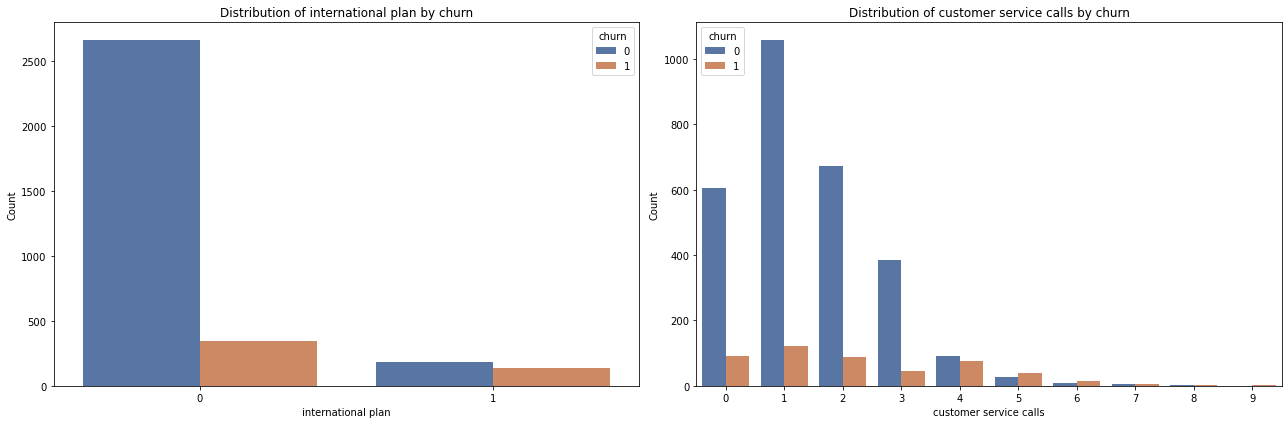

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Loop to create count plots
for i, col in enumerate(['international plan', 'customer service calls']):
    sns.countplot(data=df, x=col, hue='churn', palette='deep', ax=axes[i])
    axes[i].set_title(f'Distribution of {col} by churn')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()


1. **International plan by churn**
- Significantly more customers lack an international plan (0), that implies, churn level is relatively low among them. 
- For customers with an international plan (1), the churned portion appears proportionally much larger compared to their non-churned counterparts, hence having an international plan may be associated with an increased likelihood of churn.
2. **Customer Service Calls by Churn**
- Most customers make few service calls (0-2 calls), with counts rapidly decreasing as call numbers increase.
- For low call numbers (0-2), the proportion of churned customers is relatively small while for 3-4 calls, the proportion of churned customers increases dramatically. At the highest call volumes (5+), nearly all customers appear to churn.Majority of customers making fewer service calls likely indicates resolved issues or customer satisfaction.

- ##### Relationship between churn and columns with numerical data

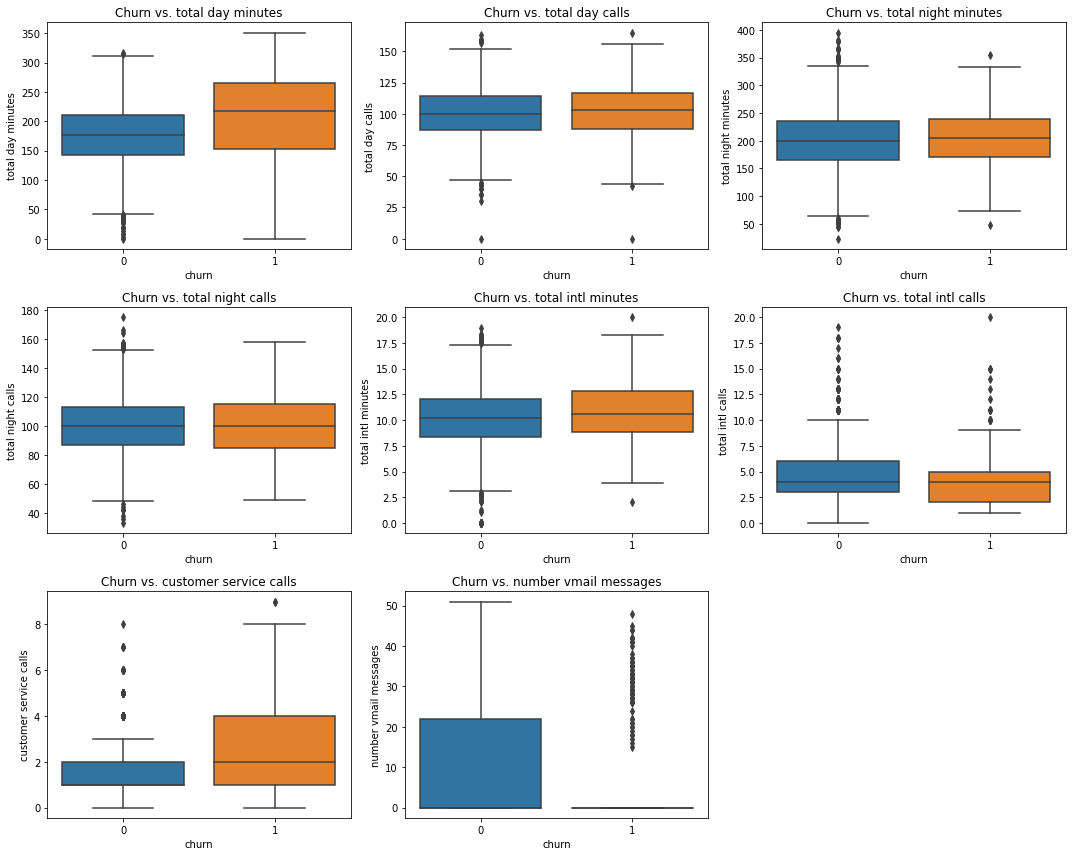

In [37]:
# Numerical columns (excluding 'account length' if it's not meaningful)
numerical_cols = [
    'total day minutes', 'total day calls',
    'total night minutes', 'total night calls',
    'total intl minutes', 'total intl calls',
    'customer service calls', 'number vmail messages'
]

# Plot boxplots for numerical features vs. churn
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, x='churn', y=col)
    plt.title(f'Churn vs. {col}')
plt.tight_layout()
plt.show()

1. **Number of Voicemail Messages vs churn**
- The majority of customers have a low number of voicemail messages.
- There are many outliers at the upper end, suggesting some customers have significantly higher voicemail messages than the rest.

3. **Total Minutes vs churn**
- Non-churn customers: Total minutes appear to be centered around a slightly lower range.
- Churned customers: These customers have a wider range of total minutes, with a higher median.
- Customers with higher total usage might be more likely to churn, potentially due to high costs.

4. **Total Calls vs churn**
- Both churned and non-churned customers show similar distributions for total calls, with no major differences.
- Total calls might not be a significant factor in predicting churn.

5. **Customer Service Calls vs churn**
- Non-churn customers: Fewer customer service calls, with most data concentrated at the lower range.
- Churned customers: More customer service calls, with some extreme outliers.
- High interaction with customer service is associated with churn, possibly indicating unresolved issues or dissatisfaction.


#### 4. Bivariate Analysis

- ##### Correlation Matrix

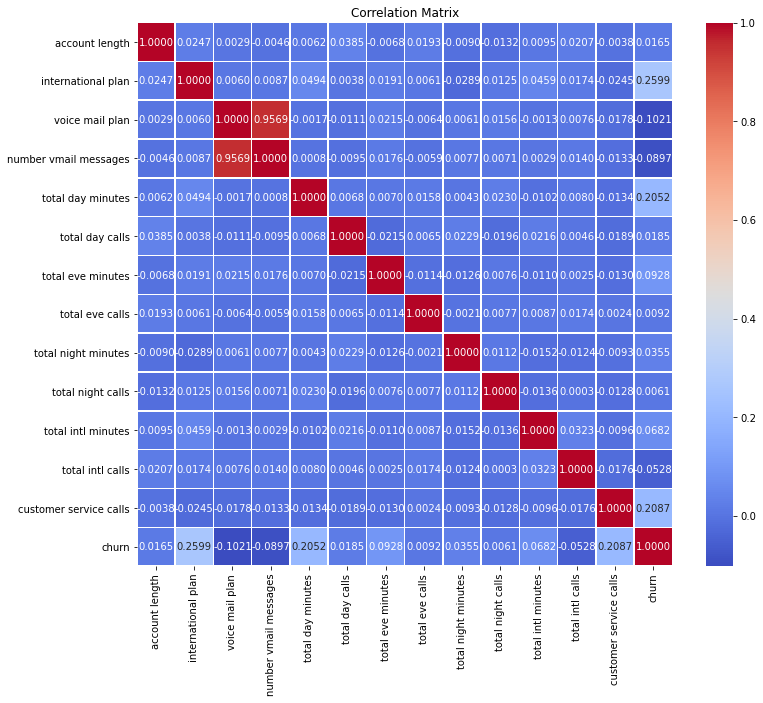

In [38]:
# Assuming you have a DataFrame called 'df' in the data
# Calculate the correlation matrix first
correlation_matrix = df.corr()

# Then create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".4f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

- Strongly correlated variables (e.g., total day minutes and total day charge) might provide redundant information.
- Variables showing significant differences in correlations (positive or negative) with the target (churn) might be more predictive.
- Features with minimal correlation (close to 0) might have limited relevance to predictive modeling unless their relationship with the target (churn) is non-linear.

Columns that are perfectly correlated provide redundant information, it's generally best to drop one of them to avoid multicollinearity and improve the model.

In [39]:
# Calculate correlation matrix (absolute values)
corr_matrix = df.corr().abs()

# Create a mask for perfectly correlated features (r = 1)
perfect_corr = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)
perfect_pairs = np.where(corr_matrix >= 1.0 - 1e-8)  # Account for floating-point precision

# Get pairs of perfectly correlated columns
correlated_pairs = [(corr_matrix.columns[i], corr_matrix.columns[j]) 
                    for i, j in zip(*perfect_pairs) if i != j]

# Identify columns to drop (keep first occurrence in each pair)
columns_to_drop = set()
for pair in correlated_pairs:
    if pair[0] not in columns_to_drop:
        columns_to_drop.add(pair[1])

# Drop the redundant columns
df_reduced = df.drop(columns=columns_to_drop)

print(f"Dropped {len(columns_to_drop)} redundant columns: {columns_to_drop}")
print(f"New shape: {df_reduced.shape}")

Dropped 0 redundant columns: set()
New shape: (3333, 15)


### Train Test Split

In [40]:
# Separate features (X) and target (y)
X = df.drop(columns=['churn'])  # Features (all columns except target)
y = df['churn']                 # Target variable

# Split into train (70%) and test (30%) with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.3, 
    random_state=42,  # Ensures reproducibility
    stratify=y       # Preserves class distribution in both sets
)

# Verify shapes and class balance
print(f"Training set: {X_train.shape}, Churn rate: {y_train.mean():.2%}")
print(f"Test set: {X_test.shape}, Churn rate: {y_test.mean():.2%}")

Training set: (2333, 14), Churn rate: 14.49%
Test set: (1000, 14), Churn rate: 14.50%


### SMOTE for Class Imbalance

The target variable 'churn' entails a class imbalance with a large number of non-churned customers (0) and far fewer churned customers (1).

I am going to apply SMOTE to the training dataset. SMOTE will generate synthetic samples to balance the dataset, making the minority class more represented and helping the Logistic Regression model make better predictions for churn. This is to avoid the imbalance affecting the model performance, especially for models such as Logistic Regression, which are sensitive to class imbalance.

In [41]:
# Identify categorical columns (modify this based on the actual data)
categorical_cols = ['state']  # Add any other categorical columns here

# Create a preprocessor that one-hot encodes categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'  # leaves numerical columns unchanged
)

# Apply preprocessing to the data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)  

# Now apply SMOTE to the processed data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)

### Standardization
To ensure that each feature contributes equally to the model.

In [42]:
# 0. Define feature matrix X and target y

X = df.drop('churn', axis=1)  # Features (all columns except 'churn')
y = df['churn']  # Target variable

# 1. Separate numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns.tolist()

# 2. Remove target variable ('churn') if present in numerical_cols
if 'churn' in numerical_cols:
    numerical_cols.remove('churn')

# 3. Create a ColumnTransformer to standardize only numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', 'passthrough', categorical_cols)  # Leave categorical columns unchanged
    ])

# 4. Fit and transform the data
X_standardized = preprocessor.fit_transform(X)  # Now X is properly defined

# 5. Convert back to DataFrame (optional)
df_standardized = pd.DataFrame(X_standardized,
                              columns=numerical_cols + categorical_cols)

print("Standardized Numerical Features (First 5 Rows):")
print(df_standardized[numerical_cols].head())

Standardized Numerical Features (First 5 Rows):
  account length number vmail messages total day minutes total day calls  \
0       0.676489               1.23488           1.56677        0.476643   
1       0.149065               1.30795         -0.333738          1.1245   
2       0.902529              -0.59176            1.1683        0.675985   
3       -0.42859              -0.59176            2.1966        -1.46694   
4      -0.654629              -0.59176          -0.24009        0.626149   

  total eve minutes total eve calls total night minutes total night calls  \
0        -0.0706096      -0.0559404            0.866743         -0.465494   
1          -0.10808        0.144867             1.05857          0.147825   
2          -1.57338        0.496279           -0.756869          0.198935   
3          -2.74286       -0.608159          -0.0785511         -0.567714   
4          -1.03893          1.0987           -0.276311            1.0678   

  total intl minutes total intl 

## Modelling and Evaluation

I will be comparing two models here:
1. **Logistic regression model**. It is simple, interpretable, and sensitive to class imbalance (tests linear relationships)i.e predicting churn or no churn.
2. **Random forest classifier**. Handles non-linearity and auto-selects important features (robust to imbalance).

We will also be evaluate these models by use of classification metrics such as roc-auc score, precision, recall and F1 score.

### 1. Logistic Regression Model

In [43]:
# Assuming X_train and X_test are the feature DataFrames
# and y_train is the target variable

# 1. Identify categorical columns correctly
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# 2. Create a proper preprocessor with correct spelling
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

# 3. Create a pipeline that scales and models
# This addresses both the categorical conversion and scaling needs
model = make_pipeline(
    preprocessor,
    StandardScaler(with_mean=False),  # with_mean=False works better with sparse one-hot encoded data
    LogisticRegression(
        class_weight='balanced',
        random_state=42,
        max_iter=1000,  # Increased from default 100
        solver='lbfgs'
    )
)

# 4. Fit the model
model.fit(X_train, y_train)

# 5. Make predictions
y_pred_logreg = model.predict(X_test)

# Optional: Get prediction probabilities
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

**Model Evaluation**

In [44]:
# Calculate metrics

print("Evaluation Metrics:")
print("------------------")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Evaluation Metrics:
------------------
Accuracy: 0.7530
Precision: 0.3344
Recall: 0.7103
F1 Score: 0.4547
ROC AUC: 0.7891

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.76      0.84       855
           1       0.33      0.71      0.45       145

    accuracy                           0.75      1000
   macro avg       0.64      0.74      0.65      1000
weighted avg       0.85      0.75      0.78      1000



**ROC Curve**

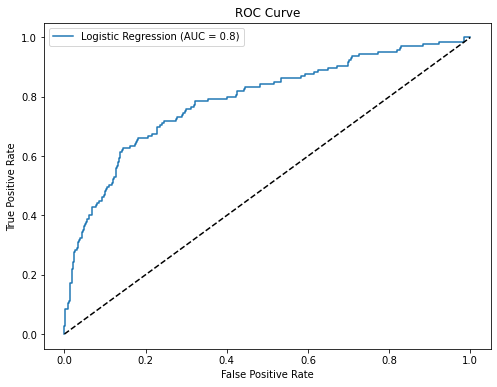

In [45]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_pred_proba):.1f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**Interpretation:**
- **Precision**: From the predicted non-churn cases, 94% were actually non-churn while the predicted churn cases, only 33% were actually churn. This implies the model is not good at predicting churn cases correctly (high false positives).
- **Recall**: 76% were correctly predicted as non-churn from the actual non-churn cases while, 71% were correctly predicted as churn from the actual churn cases. This shows that the model is relatively good at detecting churn, but it tends to misclassify many non-churn cases as churn.
- **F1 score**: A score of 0.84 is a balance between precision and recall for the non-churn class. A good value, indicating a relatively balanced performance for class 0. F1-Score = 0.45 is a lower score for the churn class, indicating that while recall is high, precision suffers significantly. The model might be over-predicting churn (false positives).
- **Accuracy**: The model accurately predicted 75% of the cases overall. Although, accuracy can be misleading hence it is not the best metric to evaluate performance in imbalanced datasets.
- **ROC-AUC score = 0.7891** It measures the model's ability to differentiate between churn and non-churn customers. The score is good and indicates that the model has a solid ability to distinguish between the two classes. Its closeness to 1 (ideal) implies the model performs well at ranking predictions.
- **ROC curve**: It indicates that the model performs better than random guessing, but it's not perfect. The curve deviates significantly from the diagonal (random classifier) and shows moderate performance.

**NOTE:**
- The model could benefit from fine-tuning, especially for improving precision for churn predictions due to its ability to detect non-churn (Class 0), in that case, I am going to compare performance using Random Forest classifier which might handle imbalanced data more effectively. 

### 2. Random Forest Classifier

In [46]:
# 1. Identify categorical columns (modify as needed)
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# 2. Create preprocessor for categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

# 3. Process the training data
X_train_processed = preprocessor.fit_transform(X_train)

# 4. Initialize and train Random Forest
# NOTE: Don't scale data for tree-based models
rf = RandomForestClassifier(
    class_weight='balanced',
    random_state=42,
    n_estimators=100  # You can adjust this
)

rf.fit(X_train_processed, y_train)

# 5. Process test data and make predictions
X_test_processed = preprocessor.transform(X_test)
y_pred_rf = rf.predict(X_test_processed)
y_pred_proba_rf = rf.predict_proba(X_test_processed)[:, 1]  # Probability of positive class

**Model Evaluation**

In [47]:
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
print(f"Random Forest ROC-AUC Score: {roc_auc_rf:.4f}")

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96       855
           1       0.91      0.50      0.65       145

    accuracy                           0.92      1000
   macro avg       0.92      0.75      0.80      1000
weighted avg       0.92      0.92      0.91      1000

Random Forest ROC-AUC Score: 0.9002


**ROC curve**

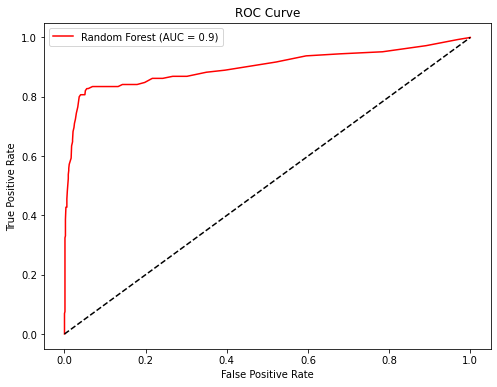

In [48]:
## 3. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_rf)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc_score(y_test, y_pred_proba_rf):.1f})', color="red")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**Interpretation:**
- **Precision**: From non-churn predictions, 92% were correct whereas from churn predictions, 91% were correct. The model is very accurate when predicting churn cases.
- **Recall**: This model accurately identified 99% of the actual non-churn customers and 50% of actual churn customers. This shows that there are still churn customers unidentified by the model.
- **F1 score**: High F1-score of 0.96 for non-churn customers indicates excellent overall performance for this class. However, f1 score of 0.65 for churn customers is a slightly lower than that of non-churn. Ultimately, the model is good at predicting churn, but there’s still room for improvement in detecting all churn customers.
- **Accuracy (0.92)**: The model precisely predicts the probability of a customer churning or not in 92% of cases.
- **ROC-AUC score(0.9002)** It elaborates excellent model performance due to its high capability of distinguishing between churn customers and non-churn customers.
- **ROC curve**: The model is skewed towards the top-left corner, showing excellent performance. In turn, the model attains high true positive rates while keeping false positives low.

### Comparison between the logistic regression model and the random forest classifier

1. **Classification Report**
- **Logistic Regression**: Performs quite well in predicting non-churn customers, but it misses 28% of them (lower recall). While the recall is higher for churn customers (indicating that 73% of actual churn cases are detected), precision is quite low, meaning many of the predicted churn cases are false positives.
- **Random Forest**: Random forest detects all non-churn customers (perfect recall), showing strong performance on this class and has high precision for churn predictions, but it misses 40% of churn cases (lower recall), similar to logistic regression but with slightly better precision.
2. **Overall Accuracy**
- **Logistic Regression**: Accuracy is 0.72, which is lower than the random forest's performance. 
- **Random Forest**: Accuracy is 0.94, reflecting the model’s ability to predict non-churn cases with high recall. While it still misses churn customers, the model’s high precision for both classes boosts its overall performance.
3. **ROC-AUC Score**
- **Logistic Regression ROC-AUC = 0.79**: The model has good discrimination power i.e it can compare and contrast between churn and non-churn with reasonable accuracy. This is a good score (0.7-0.9 = acceptable).
- **Random Forest ROC-AUC = 0.90**: This model has a significantly better performance (excellent discrimination power), with a higher AUC score (0.9-1.0 = outstanding), indicating that it can reliably identify customers at risk of churning
4. **ROC Curve**
- The more skewed the ROC curve is to the top-left corner, the better the model's performance. In this case, the **Random Forest** curve is consistently above the Logistic Regression curve.

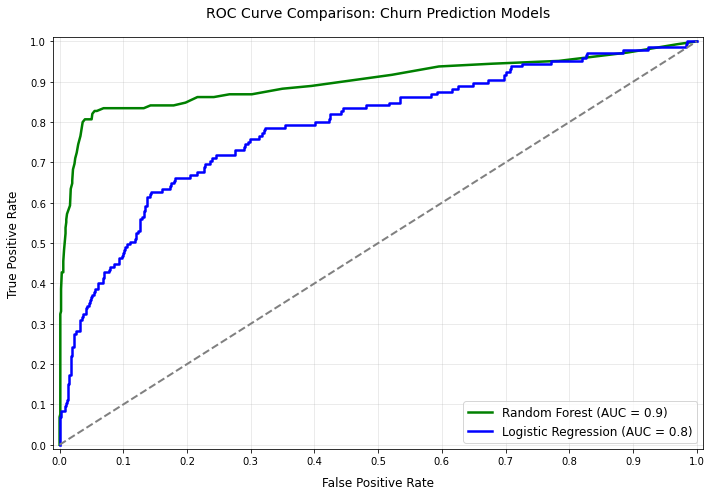


                        MODEL PERFORMANCE INTERPRETATION                        

• Random Forest (AUC = 0.90):
  - Excellent discrimination power (0.9-1.0 = outstanding)
  - Can reliably identify customers at risk of churning
  - Suitable for precision-targeted retention campaigns

• Logistic Regression (AUC = 0.79):
  - Good discrimination power (0.7-0.9 = acceptable)
  - May need threshold adjustment for churn prediction
  - Better for explainability but less accurate


In [49]:
# For Logistic Regression
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_proba)
roc_auc_lr = roc_auc_score(y_test, y_pred_proba)

# For Random Forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf)

# Set up the plot
plt.figure(figsize=(10, 7))

# Plot ROC curves
plt.plot(fpr_rf, tpr_rf, 
         label=f"Random Forest (AUC = {roc_auc_rf:.1f})", 
         color="green", 
         linewidth=2.5)
plt.plot(fpr_lr, tpr_lr, 
         label=f"Logistic Regression (AUC = {roc_auc_lr:.1f})", 
         color="blue",
         linewidth=2.5)
plt.plot([0, 1], [0, 1], 
         color="gray", 
         linestyle="--",
         linewidth=2)

# Formatting
plt.xlabel("False Positive Rate", fontsize=12, labelpad=10)
plt.ylabel("True Positive Rate", fontsize=12, labelpad=10)
plt.title("ROC Curve Comparison: Churn Prediction Models", fontsize=14, pad=20)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True, alpha=0.3)

# Set axis limits and ticks
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.tight_layout()
plt.show()

# Interpretation
print("\n" + "="*80)
print("MODEL PERFORMANCE INTERPRETATION".center(80))
print("="*80)
print(f"\n• Random Forest (AUC = {roc_auc_rf:.2f}):")
print("  - Excellent discrimination power (0.9-1.0 = outstanding)")
print("  - Can reliably identify customers at risk of churning")
print("  - Suitable for precision-targeted retention campaigns")

print(f"\n• Logistic Regression (AUC = {roc_auc_lr:.2f}):")
print("  - Good discrimination power (0.7-0.9 = acceptable)")
print("  - May need threshold adjustment for churn prediction")
print("  - Better for explainability but less accurate")

### Feature Importance Analysis
- Here, we evaluate the significance of each feature in predicting customer churn using the Random Forest classifier. Feature importance measures the extent to which each feature influences the model's predictions.

- The features with the highest importance scores play the most critical role in determining churn. Recognizing these key factors helps us pinpoint the underlying causes of customer churn, enabling targeted improvements. These findings can inform actionable strategies, such as improving customer service for at-risk users or tailoring plans to align with customer behavior patterns.

Number of features in X_train: 14
Number of importance scores: 64

Feature Importance:
                   Feature  Importance
13  customer service calls    0.003760
9      total night minutes    0.002889
10       total night calls    0.002842
4    number vmail messages    0.002368
6          total day calls    0.002325
11      total intl minutes    0.002204
8          total eve calls    0.002000
5        total day minutes    0.001923
2       international plan    0.001765
1           account length    0.001549
3          voice mail plan    0.001395
7        total eve minutes    0.001331
0                    state    0.001260
12        total intl calls    0.000941


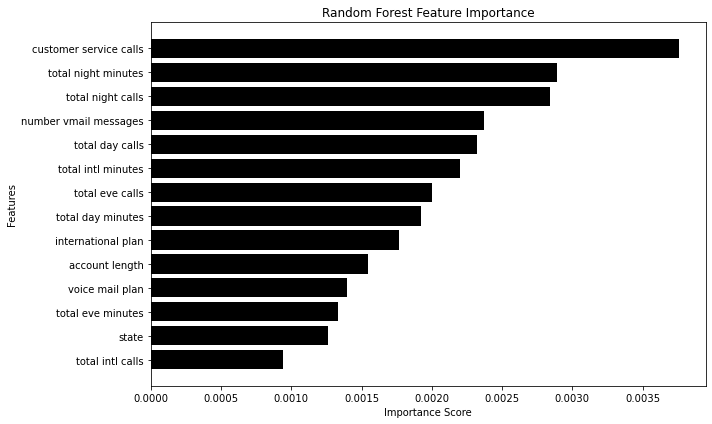

In [50]:
# Get feature importance scores from the trained Random Forest model
importances = rf.feature_importances_

# Debugging checks
print(f"Number of features in X_train: {len(X_train.columns)}")
print(f"Number of importance scores: {len(importances)}")

# Create feature names (with double-checking)
feature_names = X_train.columns.tolist()  # Ensure this matches the model's features

    # Use model's feature names if available (for RandomForest)
if hasattr(rf, 'feature_names_in_'):
        feature_names = rf.feature_names_in_
        print("Using model's feature names instead")

# Create DataFrame (with length validation)
try:
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names[:len(importances)],  # Ensure matching length
        'Importance': importances[:len(feature_names)]  # Ensure matching length
    })
except ValueError as e:
    print(f"\nERROR: {e}")
    print("Trying fallback method...")
    # Fallback - use numerical indices if names fail
    feature_importance_df = pd.DataFrame({
        'Feature': [f"Feature_{i}" for i in range(len(importances))],
        'Importance': importances
    })

# Sort and display
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance_df)

# Plotting with error handling
plt.figure(figsize=(10, 6))
try:
    plt.barh(feature_importance_df['Feature'], 
             feature_importance_df['Importance'], 
             color='black')
    plt.xlabel('Importance Score')
    plt.ylabel('Features')
    plt.title('Random Forest Feature Importance')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"\nPlotting error: {e}")
    print("Showing importance scores only.")

#### Most Important Features:

- Customer service calls and total night minutes are the top two most important features, with the highest importance scores. This suggests they have the strongest influence on the model's predictions.

#### Moderately Important Features:

- Features like total night calls, number of voicemail messages, and total day calls have intermediate importance, indicating they contribute meaningfully but less than the top features.

#### Least Important Features:

- Total eve minutes, state and total intl calls are at the bottom of the list, implying they have minimal impact on the model's predictions in this case.

## Conclusions
- **Logistic Regression** is precise on non-churn predictions but not for churn prediction, as highlighted by the low precision and recall for churn. Its performance is acceptable when computational resources are limited, but it is important to note that it is not ideal for imbalanced datasets.
- **Random Forest**, provides a balanced performance across both classes, as it is better at handling of class imbalance. Its precision and recall for non-churn customers means it performs significantly better compared to logistic regression for churn customers detection, though it still misses some churn cases. Its ROC-AUC score is much higher, indicating superior discrimination power.

## Business Recommendations

 1. For high-value customer retention:
    - Use Random Forest to identify at-risk customers. The higher ROC-AUC score and overall classification report indicate its suitability for this task.

2. For regulatory/compliance scenarios:
   - Consider Logistic Regression for its interpretability. Additionally, techniques like tuning the model further, or applying SMOTE  could improve its performance.

3. Optimal threshold selection:
   - Balance between false positives and false negatives
   - Use precision-recall curves for imbalanced data 
